# 21BDA15

In [38]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,OrdinalEncoder, StandardScaler,PowerTransformer, PolynomialFeatures
from  sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import set_config
from sklearn.metrics import mean_squared_error, plot_confusion_matrix

In [2]:
fish_data = pd.read_csv("Fish.csv")

In [3]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
fish_data.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [5]:
# The given data doesn't contain any null values.

In [23]:
fish_data.shape

(159, 7)

## Exploratory Data Analysis

In [24]:
fish_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [26]:
fish_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Weight,159.0,398.326415,357.978317,0.0000,120.00000,273.0000,650.0000,1650.000
Length1,159.0,26.247170,9.996441,7.5000,19.05000,25.2000,32.7000,59.000
Length2,159.0,28.415723,10.716328,8.4000,21.00000,27.3000,35.5000,63.400
Length3,159.0,31.227044,11.610246,8.8000,23.15000,29.4000,39.6500,68.000
Height,159.0,8.970994,4.286208,1.7284,5.94480,7.7860,12.3659,18.957
Width,159.0,4.417486,1.685804,1.0476,3.38565,4.2485,5.5845,8.142


In [6]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [7]:
fish_data['Species'].unique()

array(['Bream', 'Roach', 'Whitefish', 'Parkki', 'Perch', 'Pike', 'Smelt'],
      dtype=object)

In [36]:
fish_data['Species'].value_counts()

Perch        56
Bream        35
Roach        20
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

In [41]:
fig = px.pie(fish_data,"Species",hole=0.3,title="MOST POPULAR FISH")
fig.show()

<AxesSubplot:>

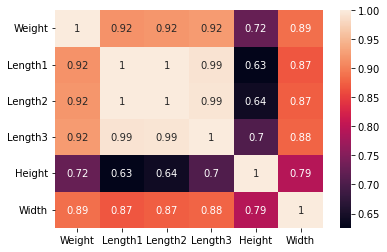

In [32]:
corr = fish_data.corr()

sns.heatmap(corr, xticklabels = corr.columns, yticklabels = corr.columns, annot = True, cmap = "rocket")

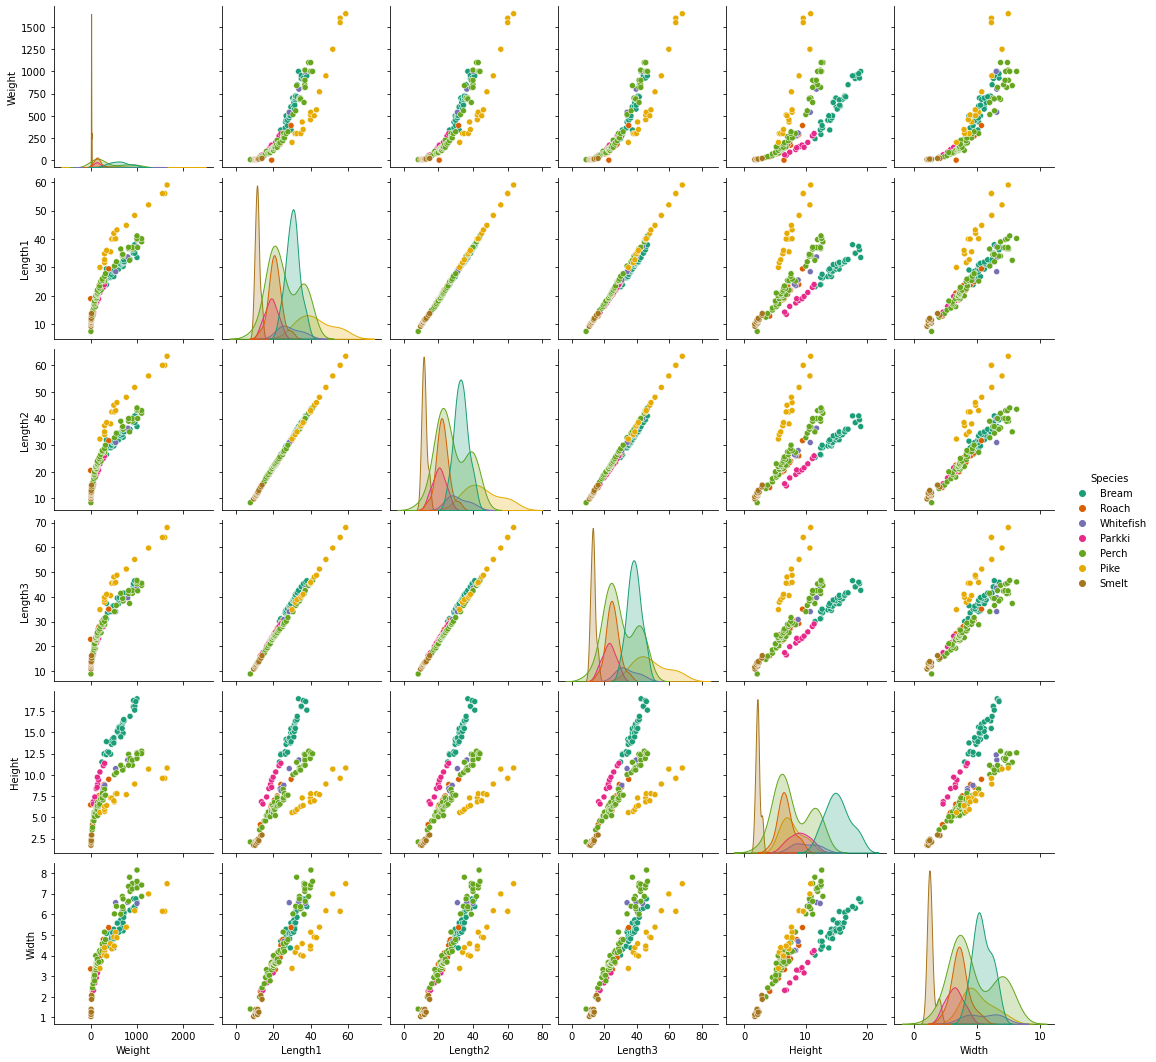

In [35]:
plot = sns.pairplot(fish_data, kind = "scatter", hue = "Species", palette = "Dark2")

C:\Users\tessy\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


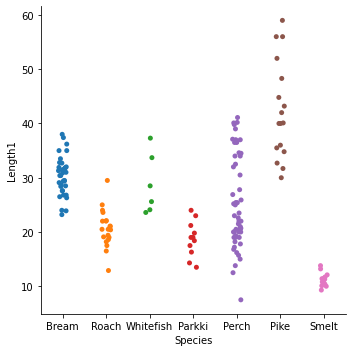

In [19]:
sns.catplot('Species','Length1',data=fish_data)
plt.show()

In [21]:
print('Max length of fish:',fish_data['Length1'].max())
print('Min length of fish:',fish_data['Length1'].min())
print('Average length of fish:',fish_data['Length1'].mean())

Max length of fish: 59.0
Min length of fish: 7.5
Average length of fish: 26.24716981132075


In [43]:
fig = px.bar(fish_data,"Species","Weight",title="WEIGHTS ANALASIS")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

In [44]:
fig = px.bar(fish_data,"Species","Height",title="HEIGHTS ANALASIS")
fig.update_layout(barmode='stack', xaxis={'categoryorder':'total descending'})
fig.show()

# Linear Regression

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
sns.set(style="darkgrid")

<AxesSubplot:xlabel='Height', ylabel='Weight'>

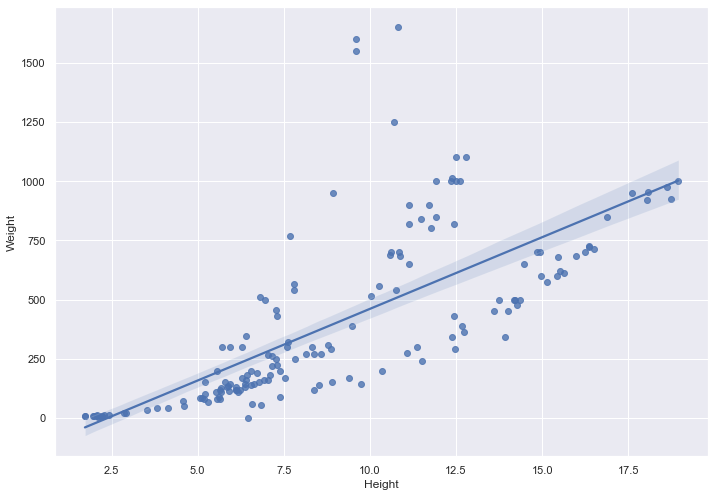

In [48]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.regplot(x="Height", y="Weight", data = fish_data)

## Simple Linear Regression

In [50]:
fish_data.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [51]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [53]:
model_data = fish_data[['Weight','Height']]
model_data.head()

,Weight,Height
0,242.0,11.5200
1,290.0,12.4800
2,340.0,12.3778
3,363.0,12.7300
4,430.0,12.4440


In [54]:
x = model_data.Height
y = model_data.Weight

In [55]:
model = LinearRegression()

In [56]:
model.fit(np.array(x).reshape(-1,1),y)

LinearRegression()

In [57]:
model.intercept_

-144.3859711547874

In [58]:
model.coef_

array([60.49635121])

In [59]:
model.score(np.array(x).reshape(-1,1),y)

0.5246761559328882

### Multiple Linear Regression

In [60]:
fish_data.columns

Index(['Species', 'Weight', 'Length1', 'Length2', 'Length3', 'Height',
       'Width'],
      dtype='object')

In [63]:
X = fish_data[['Length1', 'Length2', 'Length3', 'Height',
       'Width']]

In [64]:
y = fish_data[['Weight']]

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=4)

In [66]:
model = LinearRegression()

In [67]:
model.fit(X_train, y_train)

LinearRegression()

In [68]:
model.intercept_

array([-500.50064005])

In [69]:
model.coef_

array([[ 70.22047105, -15.35898238, -26.09726936,  25.31405469,
         17.09670515]])

In [70]:
model.score(X_train, y_train)

0.8804740550954828

In [71]:
model.predict(X_test)

array([[ 568.63549467],
       [ 614.52787227],
       [ 667.74334836],
       [ 911.01807359],
       [ 132.58137793],
       [ 880.72498456],
       [ 532.14606698],
       [ 630.93708998],
       [ 176.5394129 ],
       [ 198.77401714],
       [-192.54207536],
       [ 697.67751435],
       [ 369.57445103],
       [ 764.6271959 ],
       [ 651.69498408],
       [ 142.99560566],
       [ 645.19534929],
       [ 858.28894412],
       [  88.66824714],
       [ 448.24516286],
       [ 793.14424051],
       [ 616.15738148],
       [ 540.08947643],
       [ 160.82354258],
       [-217.89220915],
       [   4.20720761],
       [ 474.07601087],
       [ 210.11989099],
       [ 352.75065087],
       [ 879.67275971],
       [ 717.13832618],
       [  48.53027132]])

In [72]:
y_test.values

array([[ 600. ],
       [ 430. ],
       [ 720. ],
       [1100. ],
       [ 110. ],
       [1000. ],
       [ 500. ],
       [ 610. ],
       [ 160. ],
       [ 140. ],
       [   7.5],
       [ 850. ],
       [ 218. ],
       [1000. ],
       [ 700. ],
       [ 120. ],
       [ 725. ],
       [ 770. ],
       [  90. ],
       [ 450. ],
       [ 900. ],
       [ 650. ],
       [ 500. ],
       [ 110. ],
       [   6.7],
       [  55. ],
       [ 500. ],
       [ 160. ],
       [ 340. ],
       [ 950. ],
       [ 510. ],
       [ 100. ]])

In [73]:
model.score(X_test, model.predict(X_test))

1.0

In [74]:
model.score(X_train, model.predict(X_train))

1.0

In [75]:
model.score(X_test,y_test)

0.8929505570071191

In [76]:
model.score(X_train,y_train)

0.8804740550954828